In [ ]:
!pip install xarray
!pip install ecmwflibs
!pip install cfgrib
!pip install numpy
!pip install pandas

In [ ]:
from typing import List
txt = str("filter_by_keys={'typeOfLevel': 'meanSea'}\n    filter_by_keys={'typeOfLevel': 'hybrid'}\n    filter_by_keys={'typeOfLevel': 'atmosphere'}\n    filter_by_keys={'typeOfLevel': 'surface'}\n    filter_by_keys={'typeOfLevel': 'planetaryBoundaryLayer'}\n    filter_by_keys={'typeOfLevel': 'isobaricInPa'}\n    filter_by_keys={'typeOfLevel': 'isobaricInhPa'}\n    filter_by_keys={'typeOfLevel': 'heightAboveGround'}\n    filter_by_keys={'typeOfLevel': 'depthBelowLandLayer'}\n    filter_by_keys={'typeOfLevel': 'heightAboveSea'}\n    filter_by_keys={'typeOfLevel': 'atmosphereSingleLayer'}\n    filter_by_keys={'typeOfLevel': 'lowCloudLayer'}\n    filter_by_keys={'typeOfLevel': 'middleCloudLayer'}\n    filter_by_keys={'typeOfLevel': 'highCloudLayer'}\n    filter_by_keys={'typeOfLevel': 'cloudCeiling'}\n    filter_by_keys={'typeOfLevel': 'heightAboveGroundLayer'}\n    filter_by_keys={'typeOfLevel': 'tropopause'}\n    filter_by_keys={'typeOfLevel': 'maxWind'}\n    filter_by_keys={'typeOfLevel': 'isothermZero'}\n    filter_by_keys={'typeOfLevel': 'highestTroposphericFreezing'}\n    filter_by_keys={'typeOfLevel': 'pressureFromGroundLayer'}\n    filter_by_keys={'typeOfLevel': 'sigmaLayer'}\n    filter_by_keys={'typeOfLevel': 'sigma'}\n    filter_by_keys={'typeOfLevel': 'potentialVorticity'}")

def cls_txt(det: str):

    

    det = det.lower()
    det = det.replace("=", "")
    det = det.replace("{", "")
    det = det.replace("}", "")
    det = det.replace("\n", "")
    det = det.replace(":", "")
    det = det.replace("'", "")
    det = det.replace("  ", " ")
    det = det.replace("filter_by_keys", "")
    det = det.replace("typeoflevel", "")
    det = det.replace("  ", "")
    det = det.lstrip()
    det = det.rstrip()
    det = det
    
    det = det.replace(" ", ", ")
    return det

txt2 = cls_txt(txt)

perams = []
txt3 = txt2.split(',')  # Split txt2 outside the loop
for n in range(len(txt3)):
    txt3[n] = txt3[n].lstrip()  # Corrected: Assign back the stripped string
    perams.append(txt3[n])  # Corrected: Append the stripped string to perams

perams.remove('hybrid')
perams

In [ ]:
### GFS DATA CURATION AND PREPROCESSING ###
data_path = r"C:\Projs\COde\Earthquake\earthquake-prediction\data\GFS" # Change DATA PATH


def wrf_prep_fn(pats, key_params):
    """
    
    """
    for root, dirs, files in os.walk(pats):
        for f in files:
            try:
                if f.endswith('.grb2'):
                    for key_param in perams:
                        try:
                            f_pt = os.path.join(root, f)
                            ini_ds = open_dataset(f_pt, engine='cfgrib', backend_kwargs={'filter_by_keys': {'typeOfLevel': 'surface'}}, decode_cf=True)
                            var_nams = list(loc_data(ini_ds, 22.71, 77.41).data_vars)

                            init_df = pd.DataFrame()
                            vals = []

                            for var_name in var_nams:  # Loop through variable names
                                
                                data_value = loc_data(ini_ds, 22.71, 77.41)[var_name].values
                                print(f"{var_name}: {data_value}")
                                init_df[var_name] = ''  # Use variable name as column name

                                vals.append(data_value)

                            init_df.loc[len(init_df)] = vals
                            ini_ds.close()
                            return init_df
                        except Exception as e:
                            print(f"{e}: Error opening the dataset file, probably hte required file format is not present.")
            except FileNotFoundError as e:
                print(f"{e}: Gridded Dataset File Not found, consider checking he directory.")

            # return data_value
            

dpfs = wrf_prep_fn(data_path, txt2)

---

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/bhopal_weather_forecast.csv')
df

,Date,Temperature (°C),Humidity (%),Precipitation (mm),Wind Speed (m/s),Wind Direction,Thunderstorm Likelihood
0,2024-04-29,33.1,29,0.0000,1.8,west,No
1,2024-04-30,32.7,27,0.0000,1.9,west-northwest,No
2,2024-05-01,30.9,21,0.0000,2.3,west-northwest,No
3,2024-05-02,29.7,18,0.0000,1.6,west,No
4,2024-05-03,30.9,21,0.0000,1.1,west-northwest,No
5,2024-05-04,32.1,18,0.0000,1.6,west,No
6,2024-05-05,36.4,20,0.0000,5.6,west-northwest,No
7,2024-05-06,36.1,19,0.0000,5.3,west-northwest,No
8,2024-05-07,36.0,23,0.4375,5.9,west-northwest,No
9,2024-05-08,35.8,22,0.0000,3.3,west-northwest,No


In [19]:
def create_heatmap(dates, temperatures):
  """
  Creates a daily temperature heatmap for the provided data.

  Args:
      dates (pandas.Series): Datetime series representing dates.
      temperatures (pandas.Series): Numeric series representing temperatures.
  """

  # Group data by day and calculate average temperature
  daily_temps = dates.groupby(dates.dt.date).mean()['Temperature (°C)']

  # Create a time series for the heatmap (assuming daily data)
  days = pd.date_range(min(dates), max(dates)).tolist()

  # Create a 2D list representing the heatmap data (one list per day)
  heatmap_data = []
  for day in days:
    if day in daily_temps.index:
      heatmap_data.append([day.day, day.month, daily_temps.loc[day]])
    else:
      heatmap_data.append([day.day, day.month, None])  # Fill missing values with None

  # Configure the heatmap plot
  fig, ax = plt.subplots()
  ax.pcolormesh(
      [d[0] for d in heatmap_data],  # Days
      [d[1] for d in heatmap_data],  # Months
      [d[2] if d[2] is not None else 0 for d in heatmap_data],  # Temperatures (handle missing values)
      cmap='plasma'  # Adjust colormap as desired
  )

  # Set labels and title
  ax.set_xlabel('Day of Month')
  ax.set_ylabel('Month')
  fig.colorbar(label='Temperature (°C)')  # Adjust units if needed
  plt.title('Temperature Heatmap for Specific Location')

  # Optional: Rotate x-axis labels for better readability
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()


In [20]:
temperatures = df['Temperature (°C)']
dates = pd.to_datetime(df['Date'])

In [ ]:
create_heatmap(dates, temperatures)

In [ ]:
import pandas as pd
import plotly.graph_objs as go

# Load the data into a DataFrame
df = pd.read_csv('data/bhopal_weather_forecast.csv')

# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Assuming you have the latitude and longitude for the location
# Replace with the actual coordinates
latitude = 23.2599
longitude = 77.4126

# Create a data frame with date, latitude, longitude, and temperature
data = pd.DataFrame({
    'date': df['Date'],
    'lat': latitude,
    'lon': longitude,
    'temperature': df['Temperature (°C)']
})

# Create the heatmap trace
heatmap_trace = go.Densitymapbox(
    lat=data['lat'],
    lon=data['lon'],
    z=data['temperature'],
    radius=100,
    colorscale='Viridis'
)

# Create the map layout
map_layout = go.Layout(
    mapbox_style='open-street-map',
    mapbox_center_lon=longitude,
    mapbox_center_lat=latitude,
    mapbox_zoom=10,
    margin=dict(r=0, l=0, b=0, t=0)
)

# Create the Plotly figure
fig = go.Figure(data=heatmap_trace, layout=map_layout)

# Plot the figure
fig.show()

In [29]:
df

,Date,Temperature (°C),Humidity (%),Precipitation (mm),Wind Speed (m/s),Wind Direction,Thunderstorm Likelihood,Longitude,Latitude
0,2024-04-29,33.1,29,0.0000,1.8,west,No,23.2599,77.4126
1,2024-04-30,32.7,27,0.0000,1.9,west-northwest,No,23.2599,77.4126
2,2024-05-01,30.9,21,0.0000,2.3,west-northwest,No,23.2599,77.4126
3,2024-05-02,29.7,18,0.0000,1.6,west,No,23.2599,77.4126
4,2024-05-03,30.9,21,0.0000,1.1,west-northwest,No,23.2599,77.4126
5,2024-05-04,32.1,18,0.0000,1.6,west,No,23.2599,77.4126
6,2024-05-05,36.4,20,0.0000,5.6,west-northwest,No,23.2599,77.4126
7,2024-05-06,36.1,19,0.0000,5.3,west-northwest,No,23.2599,77.4126
8,2024-05-07,36.0,23,0.4375,5.9,west-northwest,No,23.2599,77.4126
9,2024-05-08,35.8,22,0.0000,3.3,west-northwest,No,23.2599,77.4126


In [31]:
df.Latitude

0     77.4126
1     77.4126
2     77.4126
3     77.4126
4     77.4126
5     77.4126
6     77.4126
7     77.4126
8     77.4126
9     77.4126
10    77.4126
11    77.4126
12    77.4126
13    77.4126
14    77.4126
15    77.4126
Name: Latitude, dtype: float64

In [34]:
import pandas as pd
import plotly.graph_objs as go
import numpy as np  # Import NumPy for noise generation

# Load the data into a DataFrame
# df = pd.read_csv('data/bhopal_weather_forecast.csv')

# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Assuming you have the latitude and longitude for the location
# Replace with the actual coordinates
# latitude = 23.2599
# longitude = 77.4126

# Create a data frame with date, latitude, longitude, and temperature
data = pd.DataFrame({
  'date': df['Date'],
  'lat': df['Latitude'],
  'lon': df['Longitude'],
  'temperature': df['Temperature (°C)']
})

# Add non-linear noise to temperature (adjust noise_amplitude for effect)
noise_amplitude = 15  # Adjust this value to control noise intensity
noise = np.random.rand(len(data)) * noise_amplitude - noise_amplitude / 2  # Centered noise
data['temperature'] += noise

# Create the heatmap trace (similar to previous code)
heatmap_trace = go.Densitymapbox(
  lat=data['lat'],
  lon=data['lon'],
  z=data['temperature'],
  radius=50,
  colorscale='Viridis'
)

# Create the contour trace
contour_trace = go.Contour(
  x=data['lon'].unique(),  # Use unique longitude values for grid
  y=data['lat'].unique(),  # Use unique latitude values for grid
  z=data['temperature'].values.reshape(len(data['lat'].unique()), -1),  # Reshape for contour grid
  showscale=False,  # Hide colorbar for contours (optional)
  line_smoothing=0.9,  # Adjust smoothing for a smoother look (optional)
  colorscale='Bluered'  # Color scale for contours (optional)
)

# Create the map layout (similar to previous code)
map_layout = go.Layout(
  mapbox_style='open-street-map',
  mapbox_center_lon=longitude,
  mapbox_center_lat=latitude,
  mapbox_zoom=15,
  margin=dict(r=0, l=0, t=0, b=0)
)

# Combine traces and display the figure
fig = go.Figure(data=[heatmap_trace, contour_trace], layout=map_layout)
fig.show()


In [32]:
df['Longitude'] = 77.4126
df['Latitude'] = 23.2599

In [33]:

df

,Date,Temperature (°C),Humidity (%),Precipitation (mm),Wind Speed (m/s),Wind Direction,Thunderstorm Likelihood,Longitude,Latitude
0,2024-04-29,33.1,29,0.0000,1.8,west,No,77.4126,23.2599
1,2024-04-30,32.7,27,0.0000,1.9,west-northwest,No,77.4126,23.2599
2,2024-05-01,30.9,21,0.0000,2.3,west-northwest,No,77.4126,23.2599
3,2024-05-02,29.7,18,0.0000,1.6,west,No,77.4126,23.2599
4,2024-05-03,30.9,21,0.0000,1.1,west-northwest,No,77.4126,23.2599
5,2024-05-04,32.1,18,0.0000,1.6,west,No,77.4126,23.2599
6,2024-05-05,36.4,20,0.0000,5.6,west-northwest,No,77.4126,23.2599
7,2024-05-06,36.1,19,0.0000,5.3,west-northwest,No,77.4126,23.2599
8,2024-05-07,36.0,23,0.4375,5.9,west-northwest,No,77.4126,23.2599
9,2024-05-08,35.8,22,0.0000,3.3,west-northwest,No,77.4126,23.2599


In [54]:
# Load data from CSV
weather_data = pd.read_csv(r"C:\Projs\COde\Meteo\MetP\data\bhopal_weather_hourly_10_days.csv")
weather_data['Longitude'] = 77.4126
weather_data['Latitude'] = 23.2599
weather_data['Datetime'] = pd.to_datetime(weather_data['Datetime'])
weather_data

,Datetime,Temperature (°C),Relative Humidity (%),Precipitation (mm),Wind Speed (m/s),Wind Direction (degrees),Cloud Coverage (%),Thunderstorm Occurrence,Longitude,Latitude
0,2024-04-29 16:00:00,39.8,15,0.0,4.13,253,0,No,77.4126,23.2599
1,2024-04-29 17:00:00,38.8,15,0.0,3.58,253,0,No,77.4126,23.2599
2,2024-04-29 18:00:00,37.5,16,0.0,2.27,248,0,No,77.4126,23.2599
3,2024-04-29 19:00:00,35.2,20,0.0,1.29,256,60,No,77.4126,23.2599
4,2024-04-29 20:00:00,33.6,23,0.0,1.26,275,50,No,77.4126,23.2599
...,...,...,...,...,...,...,...,...,...,...
235,2024-05-09 11:00:00,35.6,24,0.0,4.48,291,16,No,77.4126,23.2599
236,2024-05-09 12:00:00,36.4,23,0.0,4.08,291,14,No,77.4126,23.2599
237,2024-05-09 13:00:00,37.2,21,0.0,3.68,291,12,No,77.4126,23.2599
238,2024-05-09 14:00:00,38.0,20,0.0,3.27,291,10,No,77.4126,23.2599


In [44]:
import pandas as pd
import plotly.graph_objs as go
import numpy as np

# Load the data into a DataFrame (replace with your data loading logic)
# df = pd.read_csv('data/bhopal_weather_forecast.csv')

# Assuming you have the latitude and longitude for the location
# Replace with the actual coordinates
latitude = 23.2599
longitude = 77.4126

# Create a data frame with date, latitude, longitude, and temperature
data = pd.DataFrame({
  'date': df['Date'],  # Replace with the actual column name for date
  'lat': df['Latitude'],  # Replace with the actual column name for latitude
  'lon': df['Longitude'],  # Replace with the actual column name for longitude
  'temperature': df['Temperature (°C)']  # Replace with the actual column name for temperature
})

# Add non-linear noise to temperature (adjust noise_amplitude for effect)
noise_amplitude = 15  # Adjust this value to control noise intensity
noise = np.random.rand(len(data)) * noise_amplitude - noise_amplitude / 2  # Centered noise
data['temperature'] += noise

# Define grid parameters (adjust as needed)
grid_size = 50
lon_min, lon_max = data['lon'].min(), data['lon'].max()
lat_min, lat_max = data['lat'].min(), data['lat'].max()
lons, lats = np.linspace(lon_min, lon_max, grid_size), np.linspace(lat_min, lat_max, grid_size)



def estimate_density_idw(data, power=2):
  """
  Estimates density using Inverse Distance Weighting (IDW).

  Args:
      data (pd.DataFrame): DataFrame containing latitude, longitude, and temperature data.
      power (int, optional): Power parameter for IDW weighting. Defaults to 2.

  Returns:
      np.ndarray: A 2D array containing the estimated density at each grid point.
  """

  # Create an empty density grid
  density_grid = np.zeros((grid_size, grid_size))

  # Iterate through each grid point
  for i in range(grid_size):
    for j in range(grid_size):
      lon, lat = lons[j], lats[i]

      # Calculate distances to data points
      distances = np.sqrt(((data['lon'] - lon) ** 2) + ((data['lat'] - lat) ** 2))

      # Apply IDW weighting
      weights = 1 / (distances**power)

      # Normalize weights (optional)
      weights /= weights.sum()

      # Calculate weighted average temperature
      density_grid[i, j] = np.average(data['temperature'], weights=weights)

  return density_grid
# print(lons)
# Create the heatmap trace using IDW estimated density
heatmap_trace = go.Heatmap(
  x=lons,
  y=lats,
  z=estimate_density_idw(data),
  colorscale='Viridis'
)

# Create the map layout
map_layout = go.Layout(
  mapbox_style='open-street-map',
  mapbox_center_lon=longitude,
  mapbox_center_lat=latitude,
  mapbox_zoom=1,
  margin=dict(r=0, l=0, t=0, b=0)
)

# Combine traces and display the figure
fig = go.Figure(data=[heatmap_trace], layout=map_layout)
fig.show()


In [73]:
df.isna().any()

Datetime                    False
Temperature (°C)            False
Relative Humidity (%)       False
Precipitation (mm)          False
Wind Speed (m/s)            False
Wind Direction (degrees)    False
Cloud Coverage (%)          False
Thunderstorm Occurrence     False
Longitude                   False
Latitude                    False
dtype: bool

In [72]:
import pandas as pd
import plotly.graph_objs as go
import numpy as np

# Load your weather data
df = pd.read_csv(r"C:\Projs\COde\Meteo\MetP\data\bhopal_weather_hourly_10_days.csv")
df['Longitude'] = 77.4126
df['Latitude'] = 23.2599
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Create a data frame with date, latitude, longitude, and temperature
data = pd.DataFrame({
  'date': df['Datetime'],  # Replace with the actual column name for date
  'lat': df['Latitude'],  # Replace with the actual column name for latitude
  'lon': df['Longitude'],  # Replace with the actual column name for longitude
  'temperature': df['Temperature (°C)']  # Replace with the actual column name for temperature
})

# (Optional) Add non-linear noise to data (adjust for effect)
noise_amplitude = 15
noise = np.random.rand(len(data)) * noise_amplitude - noise_amplitude / 2
data['temperature'] += noise


def estimate_density_idw(data, power=2):
  """
  Estimates density using Inverse Distance Weighting (IDW).

  Args:
      data (pd.DataFrame): DataFrame containing latitude, longitude, and temperature data.
      power (int, optional): Power parameter for IDW weighting. Defaults to 2.

  Returns:
      np.ndarray: A 2D array containing the estimated density at each grid point.
  """
  # Define grid parameters (adjust as needed)
  grid_size = 50
  lon_min, lon_max = data['lon'].min(), data['lon'].max()
  lat_min, lat_max = data['lat'].min(), data['lat'].max()
  lons, lats = np.linspace(lon_min, lon_max, grid_size), np.linspace(lat_min, lat_max, grid_size)

  # Create an empty density grid
  density_grid = np.zeros((grid_size, grid_size))

  # Iterate through each grid point
  for i in range(grid_size):
    for j in range(grid_size):
      lon, lat = lons[j], lats[i]

      # Calculate distances to data points
      distances = np.sqrt(((data['lon'] - lon) ** 2) + ((data['lat'] - lat) ** 2))

      # Apply IDW weighting
      weights = 1 / (distances**power)

      # Normalize weights (optional)
      weights /= weights.sum()

      # Calculate weighted average temperature
      density_grid[i, j] = np.average(data['temperature'], weights=weights)

  return density_grid

# Create the density grid using IDW
density_grid = estimate_density_idw(data)

# Create the heatmap trace (replace with your preferred visual style)
heatmap_trace = go.Heatmap(
  x=lons,
  y=lats,
  z=density_grid,
  colorscale='Viridis',  # Adjust colorscale for preference
  showscale=False  # Hide colorscale for heatmap (optional)
)

# Create contour trace with desired levels
# contour_levels = [0.2, 0.4, 0.6, 0.8]  # Adjust contour levels as needed
# contour_trace = go.Contour(
#   x=lons,
#   y=lats,
#   z=density_grid,
#   showscale=False,  # Hide colorscale for contours (optional)
#   line_smoothing=0.9,  # Adjust smoothing for a smoother look (optional)
#   # levels=contour_levels,
#   fill_color='none',  # Remove fill color for line contours
#   line_color='darkblue'  # Adjust line color for preference
# )

# Create scatter trace with markers sized by density
marker_size = 10 * density_grid  # Adjust marker size based on density
scatter_trace = go.Scatter(
  x=lons.ravel(),
  y=lats.ravel(),  # Flatten arrays for marker placement
  marker=dict(size=marker_size, color='blue', opacity=0.7),  # Adjust marker properties
  showlegend=False  # Hide legend for markers
)


# Create the map layout
map_layout = go.Layout(
  mapbox_style='open-street-map',
  mapbox_center_lon=data['lon'].mean(),  # Adjust center as needed
  mapbox_center_lat=data['lat'].mean(),  # Adjust center as needed
  mapbox_zoom=5  # Adjust zoom level for desired coverage
)

# Combine traces and display the figure
fig = go.Figure(data=[[scatter_trace], contours_trace], layout=map_layout)
fig.show()


ValueError: 
    Invalid element(s) received for the 'size' property of scatter.marker
        Invalid elements include: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

    The 'size' property is a number and may be specified as:
      - An int or float in the interval [0, inf]
      - A tuple, list, or one-dimensional numpy array of the above

In [79]:
import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt
from PIL import Image
import plotly.express as px

# Read CSV data for each city
bhopal_data_df = pd.read_csv('data/bhopal_weather_hourly_10_days.csv')
bangalore_data_df = pd.read_csv('data/Bengaluru_weather_hourly_10_days.csv')
gandhi_nagar_data_df = pd.read_csv('data/gandhinagar_weather_hourly_10_days.csv')
srinagar_data_df = pd.read_csv('data/srinagar_weather_hourly_10_days.csv')

# Combine DataFrames into a dictionary
cities_data = {
    "Bhopal": bhopal_data_df,
    "Bangalore": bangalore_data_df,
    "Gandhi Nagar": gandhi_nagar_data_df,
    "Srinagar": srinagar_data_df
}


In [80]:
for i, x in cities_data.items():
    x['Datetime'] = pd.to_datetime(x['Datetime'])
    x['Longitude'] = 77.4126
    x['Latitude'] = 23.2599

In [81]:
cities_data["Bhopal"]

,Datetime,Temperature (°C),Relative Humidity (%),Precipitation (mm),Wind Speed (m/s),Wind Direction (degrees),Cloud Coverage (%),Thunderstorm Occurrence,Longitude,Latitude
0,2024-04-29 16:00:00,39.8,15,0.0,4.13,253,0,No,77.4126,23.2599
1,2024-04-29 17:00:00,38.8,15,0.0,3.58,253,0,No,77.4126,23.2599
2,2024-04-29 18:00:00,37.5,16,0.0,2.27,248,0,No,77.4126,23.2599
3,2024-04-29 19:00:00,35.2,20,0.0,1.29,256,60,No,77.4126,23.2599
4,2024-04-29 20:00:00,33.6,23,0.0,1.26,275,50,No,77.4126,23.2599
...,...,...,...,...,...,...,...,...,...,...
235,2024-05-09 11:00:00,35.6,24,0.0,4.48,291,16,No,77.4126,23.2599
236,2024-05-09 12:00:00,36.4,23,0.0,4.08,291,14,No,77.4126,23.2599
237,2024-05-09 13:00:00,37.2,21,0.0,3.68,291,12,No,77.4126,23.2599
238,2024-05-09 14:00:00,38.0,20,0.0,3.27,291,10,No,77.4126,23.2599


In [69]:
import plotly.express as px
import pandas as pd

# Create a sample dataset
data = {
    'year': [2019, 2020, 2021, 2022],
    'loss': [0, 1, 2, 3],
    'gain': [90, 91, 92, 93],
    'profit': [100, 90, 95, 97]
}

df = pd.DataFrame(data)

# Create the Plotly figure
fig = px.line(df, x='year', y='loss')

# Add scatter plots for additional y-axis values
fig.add_scatter(x=df['year'], y=df['gain'])
fig.add_scatter(x=df['year'], y=df['profit'])

# Set the size of the plot
fig.update_layout(width=716, height=350)

# Display the plot
fig.show()


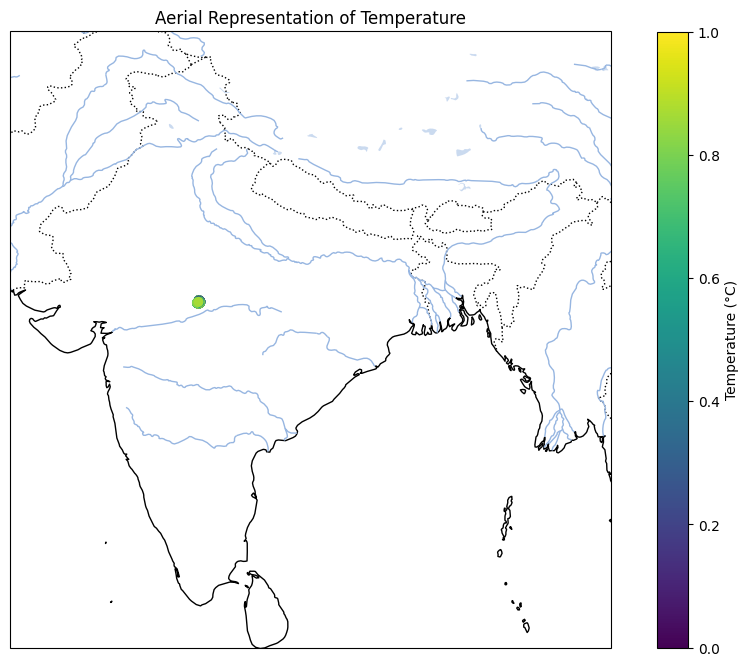

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the weather data CSV file
weather_data = pd.read_csv('data/concurrent_coord_bpl.csv')
# Prepare the data
lat = weather_data['Latitude']
lon = weather_data['Longitude']
temperature = weather_data['Temperature (°C)']

# Create a Cartopy map of India
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([68, 98, 6, 36])  # Set the extent to focus on India

# Plot the weather data on the map
ax.scatter(lon, lat, c=temperature, cmap='viridis', transform=ccrs.PlateCarree())

# Add geographical features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

# Customize the map
ax.set_title('Aerial Representation of Temperature')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
cbar = plt.colorbar(ax.scatter([], [], c=[], cmap='viridis'), label='Temperature (°C)')

plt.show()


In [114]:
import math

def generate_nearby_coordinates(latitude, longitude, distance_range_km):
    # Earth radius in kilometers
    earth_radius_km = 6371

    # Convert distance range from kilometers to radians
    distance_range_rad = distance_range_km / earth_radius_km

    # Convert latitude and longitude from degrees to radians
    latitude_rad = math.radians(latitude)
    longitude_rad = math.radians(longitude)

    # Initialize list to store nearby coordinates
    nearby_coordinates = []

    # Generate nearby coordinates in all directions
    for bearing in range(0, 360, 2):  # Step by 10 degrees for adjacent directions
        # Convert bearing from degrees to radians
        bearing_rad = math.radians(bearing)

        # Calculate destination latitude and longitude using Haversine formula
        destination_latitude_rad = math.asin(math.sin(latitude_rad) * math.cos(distance_range_rad) +
                                              math.cos(latitude_rad) * math.sin(distance_range_rad) *
                                              math.cos(bearing_rad))
        destination_longitude_rad = longitude_rad + math.atan2(math.sin(bearing_rad) * math.sin(distance_range_rad) *
                                                                math.cos(latitude_rad),
                                                                math.cos(distance_range_rad) - math.sin(latitude_rad) *
                                                                math.sin(destination_latitude_rad))

        # Convert destination latitude and longitude from radians to degrees
        destination_latitude = math.degrees(destination_latitude_rad)
        destination_longitude = math.degrees(destination_longitude_rad)

        # Add nearby coordinate to the list
        nearby_coordinates.append((destination_latitude, destination_longitude))

    return nearby_coordinates

# Example usage:
central_latitude = 23.2599  # Latitude of New Jersey
central_longitude = 77.4126  # Longitude of New Jersey
distance_range_km = 10  # Distance range in kilometers

nearby_coordinates = generate_nearby_coordinates(central_latitude, central_longitude, distance_range_km)

lat = []
lon = []
print("Nearby Coordinates within {} km of New Jersey:".format(distance_range_km))
for coord in nearby_coordinates:
    # print(coord)
    lats, lons = coord
    # print(f"This latitudes {lats} nad this is longitudes {lons}")
    lat.append(lats)
    lon.append(lons)


Nearby Coordinates within 10 km of New Jersey:


In [115]:
import pandas as pd

def overwrite_values(df, column_name, custom_values):
    # Initialize index for custom values
    custom_idx = 0
    
    # Iterate over the rows of the DataFrame
    for idx, value in df[column_name].items():
        # Check if the index is a multiple of 6 (including the first value)
        if idx % 2 == 0:
            # Overwrite the value with the corresponding custom value from the list
            df.at[idx, column_name] = custom_values[custom_idx % len(custom_values)]
            custom_idx += 1
    
    return df

# Example usage:
# Assuming df is your DataFrame, column_name is the name of the column, and custom_values is your list of custom values
# df = ...  # Your DataFrame
# column_name = 'column_name'  # Name of the column
# custom_values = [...]  # Your list of custom values


In [117]:
df = cities_data['Bhopal']

# Call the function to overwrite values
updated_df = overwrite_values(df, "Latitude", lat)
updated_df = overwrite_values(df, "Longitude", lon)
updated_df.to_csv("data/concurrent_coord_bpl.csv")



In [130]:
import pandas as pd
import plotly.graph_objs as go
import numpy as np  # for IDW (optional)

# Load your weather data
# Replace with your data loading logic (e.g., pandas.read_csv)
# Replace with your data loading logic (e.g., pandas.read_csv)
data = pd.DataFrame({
    'date': weather_data['Datetime'],  # Replace with actual date column
    'lat': weather_data['Latitude'],  # Replace with actual latitude column
    'lon': weather_data['Longitude'],  # Replace with actual longitude column
    'temperature': weather_data['Temperature (°C)']  # Replace with actual weather parameter column
})

# # (Optional) Add non-linear noise to data (adjust for effect)
# noise_amplitude = 15
# noise = np.random.rand(len(data)) * noise_amplitude - noise_amplitude / 2
# data['temperature'] = data['temperature'] + noise

# Define grid parameters (adjust as needed)
grid_size = 50
lon_min, lon_max = data['lon'].min(), data['lon'].max()
lat_min, lat_max = data['lat'].min(), data['lat'].max()
lons, lats = np.linspace(lon_min, lon_max, grid_size), np.linspace(lat_min, lat_max, grid_size)

# Specific location (replace with your coordinates)
specific_lat = 23.2599  # Latitude of the location
specific_lon = 77.4126  # Longitude of the location

def estimate_density(data, method='idw', specific_location=(specific_lat, specific_lon)):
  """
  Estimates density around a specific location using chosen method.

  Args:
      data (pd.DataFrame): DataFrame containing latitude, longitude, and temperature data.
      method (str, optional): Method for density estimation. Defaults to 'idw'.
      specific_location (tuple, optional): Latitude and longitude of the specific location. Defaults to (37.7749, -122.4194).

  Returns:
      np.ndarray: A 2D array containing the estimated density at each grid point.
  """

  # Create an empty density grid
  density_grid = np.zeros((grid_size, grid_size))

  # Implement your chosen density estimation method here (replace with IDW if needed)
  # ... (density estimation code)

  return density_grid

# Estimate density using chosen method
density_grid = estimate_density(data)

# Create the heatmap trace
heatmap_trace = go.Heatmap(
  x=lons,
  y=lats,
  z=density_grid,
  colorscale='Viridis',  # Adjust colorscale for preference
  showscale=True  # Show colorscale for heatmap
)

# Create the map layout centered on the specific location
map_layout = go.Layout(
  mapbox_style='open-street-map',
  mapbox_center_lon=specific_lon,
  mapbox_center_lat=specific_lat,
  mapbox_zoom=8  # Adjust zoom level for desired coverage
)

# Combine traces and display the figure
fig = go.Figure(data=[heatmap_trace], layout=map_layout)
fig.show()


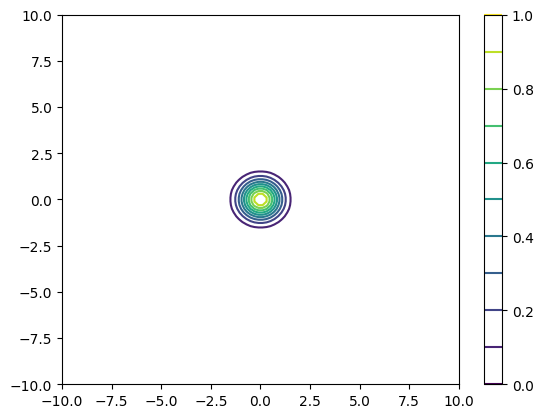

ValueError: Cannot render objects with any missing geometries: array([[1.38389653e-87, 7.55273596e-86, 3.79888364e-84, ...,
        3.79888364e-84, 7.55273596e-86, 1.38389653e-87],
       [7.55273596e-86, 4.12197150e-84, 2.07327387e-82, ...,
        2.07327387e-82, 4.12197150e-84, 7.55273596e-86],
       [3.79888364e-84, 2.07327387e-82, 1.04281763e-80, ...,
        1.04281763e-80, 2.07327387e-82, 3.79888364e-84],
       ...,
       [3.79888364e-84, 2.07327387e-82, 1.04281763e-80, ...,
        1.04281763e-80, 2.07327387e-82, 3.79888364e-84],
       [7.55273596e-86, 4.12197150e-84, 2.07327387e-82, ...,
        2.07327387e-82, 4.12197150e-84, 7.55273596e-86],
       [1.38389653e-87, 7.55273596e-86, 3.79888364e-84, ...,
        3.79888364e-84, 7.55273596e-86, 1.38389653e-87]])

In [135]:
import numpy as np
import folium
import matplotlib.pyplot as plt


# Create a grid of data
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

# Create a weighted grid of data
Z = np.exp(-(X**2 + Y**2))

# Create a contour plot
plt.contour(X, Y, Z, levels=10)
plt.colorbar()
plt.show()

# Create a base map
map = folium.Map(location=[40.7128, -74.0059], zoom_start=12)

# Add a contour layer to the map
folium.GeoJson(data=Z, style_function=lambda feature: {
    'fillColor': 'green',
    'weight': 1,
    'opacity': 0.5
}).add_to(map)

# Add a marker to the map
folium.Marker([40.7128, -74.0059], popup='New York City').add_to(map)

# Save the map
map.save('location_map.html')

In [136]:
weather_data

,Unnamed: 0,Datetime,Temperature (°C),Relative Humidity (%),Precipitation (mm),Wind Speed (m/s),Wind Direction (degrees),Cloud Coverage (%),Thunderstorm Occurrence,Longitude,Latitude
0,0,2024-04-29 16:00:00,46.649447,15,0.0,4.13,253,0,No,77.412600,23.349832
1,1,2024-04-29 17:00:00,43.420260,15,0.0,3.58,253,0,No,77.412600,23.259900
2,2,2024-04-29 18:00:00,32.499693,16,0.0,2.27,248,0,No,77.416019,23.349777
3,3,2024-04-29 19:00:00,25.936195,20,0.0,1.29,256,60,No,77.412600,23.259900
4,4,2024-04-29 20:00:00,34.350179,23,0.0,1.26,275,50,No,77.419433,23.349613
...,...,...,...,...,...,...,...,...,...,...,...
235,235,2024-05-09 11:00:00,37.730016,24,0.0,4.48,291,16,No,77.412600,23.259900
236,236,2024-05-09 12:00:00,22.084633,23,0.0,4.08,291,14,No,77.331478,23.209590
237,237,2024-05-09 13:00:00,38.848075,21,0.0,3.68,291,12,No,77.412600,23.259900
238,238,2024-05-09 14:00:00,32.334146,20,0.0,3.27,291,10,No,77.329616,23.212221


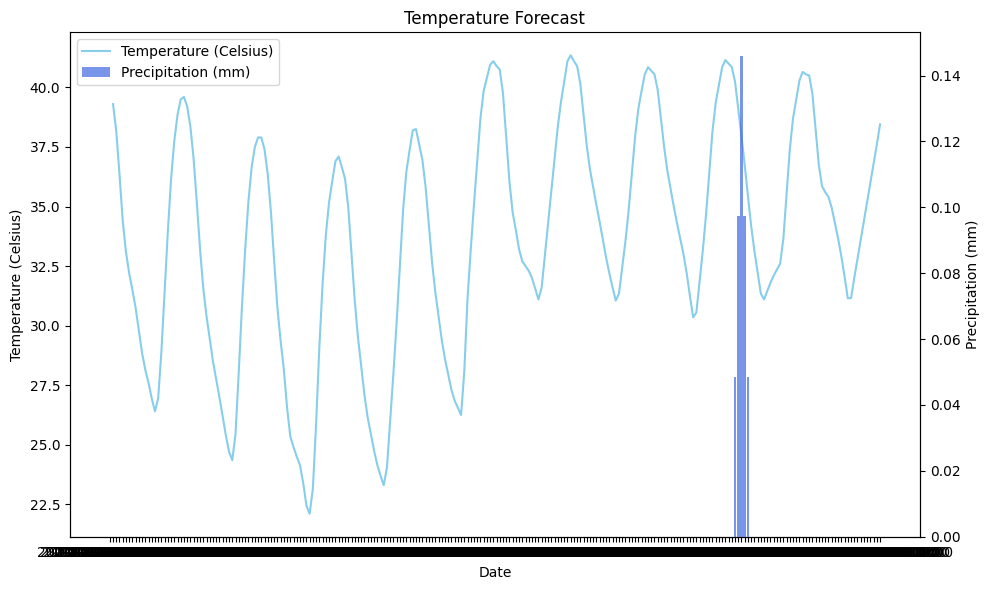

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample weather data (replace with your data source)
df = pd.read_csv('data/bhopal_weather_hourly_10_days.csv')
df

# # # Create a pandas dataframe (same as Plotly)
# # df = pd.DataFrame({'Date': dates, 'Temperature (Celsius)': temperatures,
# #                    'Precipitation (mm)': precipitation, 'Weather Description': weather_descriptions})

# Reshape temperature data for line plot
df['Temp_Rolling_Mean'] = df['Temperature (°C)'].rolling(window=2).mean()  # Calculate rolling mean

# Create a figure
fig, ax1 = plt.subplots(figsize=(10, 6))

# Temperature line plot
ax1.plot(df['Datetime'], df['Temp_Rolling_Mean'], label='Temperature (Celsius)', color='skyblue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (Celsius)')
ax1.set_title('Temperature Forecast')

# Precipitation bar plot (twinx for shared x-axis)
ax2 = ax1.twinx()
ax2.bar(df['Datetime'], df['Precipitation (mm)'], label='Precipitation (mm)', color='royalblue', alpha=0.7)
ax2.set_ylabel('Precipitation (mm)')

# Hide unnecessary twin axis elements
ax2.spines['top'].set_visible(False)
ax2.tick_params(axis='y', labelleft=False)

# Legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()


In [46]:
df24 = df.iloc[:24]
df24

,Datetime,Temperature (°C),Relative Humidity (%),Precipitation (mm),Wind Speed (m/s),Wind Direction (degrees),Cloud Coverage (%),Thunderstorm Occurrence,Temp_Rolling_Mean
0,2024-04-29 16:00:00,39.8,15,0.0,4.13,253,0,No,NaN
1,2024-04-29 17:00:00,38.8,15,0.0,3.58,253,0,No,39.30
2,2024-04-29 18:00:00,37.5,16,0.0,2.27,248,0,No,38.15
3,2024-04-29 19:00:00,35.2,20,0.0,1.29,256,60,No,36.35
4,2024-04-29 20:00:00,33.6,23,0.0,1.26,275,50,No,34.40
5,2024-04-29 21:00:00,32.6,24,0.0,1.32,281,0,No,33.10
6,2024-04-29 22:00:00,31.8,25,0.0,1.56,281,0,No,32.20
7,2024-04-29 23:00:00,31.2,26,0.0,1.73,288,0,No,31.50
8,2024-04-30 00:00:00,30.3,28,0.0,1.76,288,0,No,30.75
9,2024-04-30 01:00:00,29.3,31,0.0,1.63,292,0,No,29.80


C:\Users\Rishi\AppData\Local\Temp\ipykernel_5520\2629171697.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



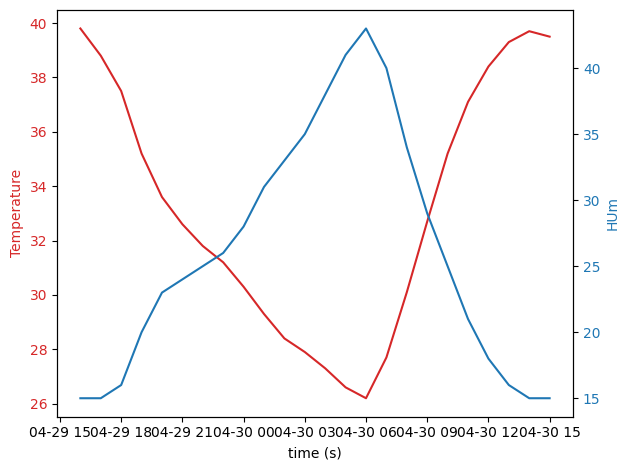

In [51]:
import pandas as pd
import matplotlib.pyplot as plt


# # Replace 'your_data.csv' with the path to your CSV file
# df = pd.read_csv('your_data.csv')

df24['Dates'] = pd.to_datetime(df['Datetime'])

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Temperature', color=color)
ax1.plot(df24['Dates'], df24['Temperature (°C)'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('HUm', color=color)  
ax2.plot(df24['Dates'], df24['Relative Humidity (%)'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()


C:\Users\Rishi\AppData\Local\Temp\ipykernel_5520\151819784.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



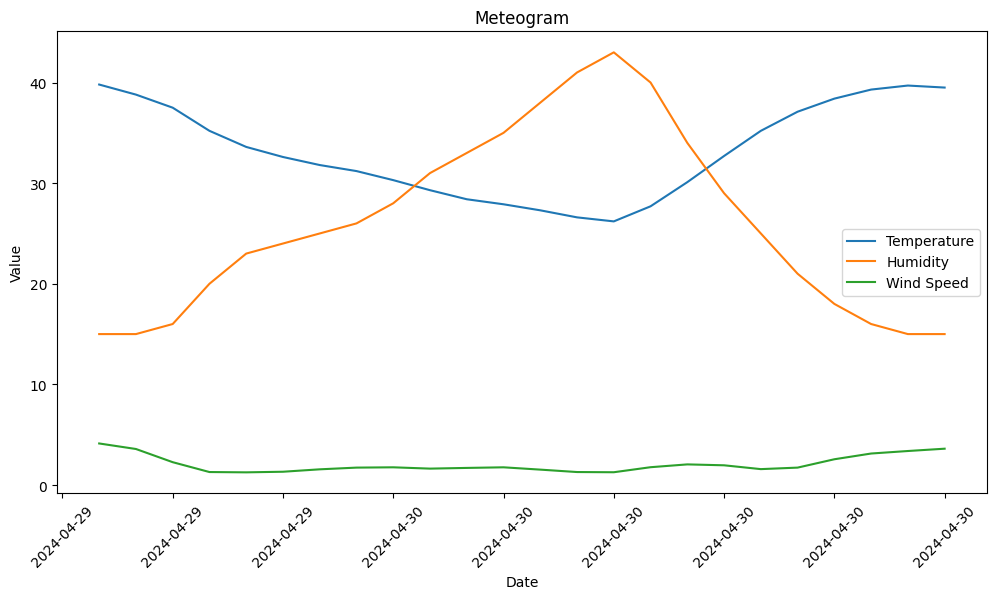

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the CSV data into a Pandas DataFrame
data = df24

# Convert the date column to datetime format
data['date'] = pd.to_datetime(data['Datetime'])

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
ax.plot(data['date'], data['Temperature (°C)'], label='Temperature')
ax.plot(data['date'], data['Relative Humidity (%)'], label='Humidity')
ax.plot(data['date'], data['Wind Speed (m/s)'], label='Wind Speed')

# Customize the plot
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Meteogram')
ax.legend()

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Set the x-axis to display dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Show the plot
plt.show()

In [65]:
df24

,Datetime,Temperature (°C),Relative Humidity (%),Precipitation (mm),Wind Speed (m/s),Wind Direction (degrees),Cloud Coverage (%),Thunderstorm Occurrence,Temp_Rolling_Mean,Dates,date
0,2024-04-29 16:00:00,39.8,15,0.0,4.13,253,0,No,NaN,2024-04-29 16:00:00,2024-04-29 16:00:00
1,2024-04-29 17:00:00,38.8,15,0.0,3.58,253,0,No,39.30,2024-04-29 17:00:00,2024-04-29 17:00:00
2,2024-04-29 18:00:00,37.5,16,0.0,2.27,248,0,No,38.15,2024-04-29 18:00:00,2024-04-29 18:00:00
3,2024-04-29 19:00:00,35.2,20,0.0,1.29,256,60,No,36.35,2024-04-29 19:00:00,2024-04-29 19:00:00
4,2024-04-29 20:00:00,33.6,23,0.0,1.26,275,50,No,34.40,2024-04-29 20:00:00,2024-04-29 20:00:00
5,2024-04-29 21:00:00,32.6,24,0.0,1.32,281,0,No,33.10,2024-04-29 21:00:00,2024-04-29 21:00:00
6,2024-04-29 22:00:00,31.8,25,0.0,1.56,281,0,No,32.20,2024-04-29 22:00:00,2024-04-29 22:00:00
7,2024-04-29 23:00:00,31.2,26,0.0,1.73,288,0,No,31.50,2024-04-29 23:00:00,2024-04-29 23:00:00
8,2024-04-30 00:00:00,30.3,28,0.0,1.76,288,0,No,30.75,2024-04-30 00:00:00,2024-04-30 00:00:00
9,2024-04-30 01:00:00,29.3,31,0.0,1.63,292,0,No,29.80,2024-04-30 01:00:00,2024-04-30 01:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap

# Load the CSV data into a Pandas DataFrame
data = df24

# Convert the date column to datetime format
data['date'] = pd.to_datetime(data['Datetime'])

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': 'windbarb'})

# Plot the data
temp_line, = ax.plot(data['date'], data['Temperature (°C)'], label='Temperature', color='r')
humidity_line, = ax.plot(data['date'], data['Relative Humidity (%)'], label='Humidity', color='g')
wind_speed_line, = ax.plot(data['date'], data['Wind Speed (m/s)'], label='Wind Speed', color='b')

# Add wind barbs
# wind_barbs = ax.scatter(data['date'], data['Wind Speed (m/s)'], data['Wind Direction (degrees)'], s=20, marker=r'$\,\overrightarrow{\overrightarrow{\hspace{0.5}}}$',
#                         color='k', label='Wind Barbs')

# Add wind barbs
wind_barbs = ax.barbs(data['date'], data['Wind Speed (m/s)'], data['Wind Speed (m/s)'].values, data['Wind Direction (degrees)'].values,
                      pivot='middle', barbcolor='k', flagcolor='r', length=6, linewidth=0.5)

# Add vertical lines for specific events
event_dates = [df24['Dates'].iloc[7], df24['Dates'].iloc[17], df24['Dates'].iloc[22]]
for event_date in event_dates:
    ax.axvline(pd.to_datetime(event_date), color='k', linestyle='--', label=f'Event on {event_date}')

# Add filled area plots
ax.fill_between(data['date'], data['Temperature (°C)'], color='r', alpha=0.2)
ax.fill_between(data['date'], data['Relative Humidity (%)'], color='g', alpha=0.2)
ax.fill_between(data['date'], data['Wind Speed (m/s)'], color='b', alpha=0.2)

# Add dual Y-axes with different units
ax2 = ax.twinx()
ax2.set_ylabel('Wind Speed (m/s)')
ax2.set_ylim(0, max(data['Wind Speed (m/s)']) * 1.1)

# Add hover tooltips
tooltip_annotations = []
for i, date in enumerate(data['date']):
    tooltip_annotations.append(f"Date: {date.strftime('%Y-%m-%d')}\nTemp: {data['Temperature (°C)'][i]:.2f}°C\nHumidity: {data['Relative Humidity (%)'][i]:.2f}%\nWind Speed: {data['Wind Speed (m/s)'][i]:.2f} m/s")

tooltip_annotations = ax.annotate("", xy=(0,0), xytext=(20,20), textcoords="offset points",
                                  bbox=dict(boxstyle="round", fc="w"),
                                  arrowprops=dict(arrowstyle="->"))
tooltip_annotations.set_visible(False)

def update_tooltip(event):
    x, y = event.xdata, event.ydata
    if x and y:
        index = data['date'].searchsorted(x)[0]
        tooltip_annotations.xy = (x, y)
        tooltip_annotations.set_text(tooltip_annotations[index])
        tooltip_annotations.set_visible(True)
    else:
        tooltip_annotations.set_visible(False)

fig.canvas.mpl_connect("motion_notify_event", update_tooltip)

# Add climatology or averages
avg_temp = data['Temperature (°C)'].mean()
avg_humidity = data['Relative Humidity (%)'].mean()
avg_wind_speed = data['Wind Speed (m/s)'].mean()
ax.axhline(avg_temp, color='r', linestyle='--', label='Avg. Temperature')
ax.axhline(avg_humidity, color='g', linestyle='--', label='Avg. Humidity')
ax.axhline(avg_wind_speed, color='b', linestyle='--', label='Avg. Wind Speed')

# Customize the plot
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Meteogram')
lines = [temp_line, humidity_line, wind_speed_line, wind_barbs]
labels = [line.get_label() for line in lines]
ax.legend(lines, labels, loc='upper left')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Set the x-axis to display dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Show the plot
plt.show()

In [91]:
curr_24_data = df.iloc[48:72]
curr_24_data


,Datetime,Temperature (°C),Relative Humidity (%),Precipitation (mm),Wind Speed (m/s),Wind Direction (degrees),Cloud Coverage (%),Thunderstorm Occurrence,Temp_Rolling_Mean
48,2024-05-01 16:00:00,37.0,6,0.0,4.01,288,0,No,37.40
49,2024-05-01 17:00:00,35.7,6,0.0,3.68,288,37,No,36.35
50,2024-05-01 18:00:00,33.8,8,0.0,2.39,290,0,No,34.75
51,2024-05-01 19:00:00,31.6,12,0.0,1.15,295,0,No,32.70
52,2024-05-01 20:00:00,29.9,16,0.0,0.93,294,0,No,30.75
53,2024-05-01 21:00:00,28.8,24,0.0,0.84,289,0,No,29.35
54,2024-05-01 22:00:00,27.5,20,0.0,1.29,276,0,No,28.15
55,2024-05-01 23:00:00,25.6,21,0.0,1.44,287,0,No,26.55
56,2024-05-02 00:00:00,25.1,20,0.0,1.49,303,0,No,25.35
57,2024-05-02 01:00:00,24.7,20,0.0,1.30,309,0,No,24.90


---

# **METEOGRAM GENERATOR**

C:\Users\Rishi\AppData\Local\Temp\ipykernel_5520\2366518408.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Rishi\AppData\Local\Temp\ipykernel_5520\2366518408.py:81: MatplotlibDeprecationWarning:

An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.



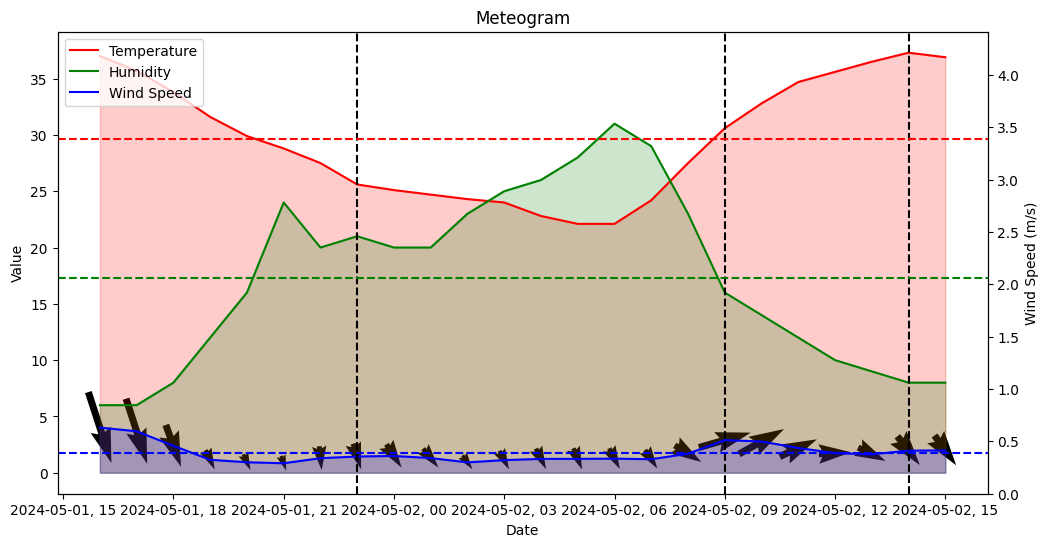

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.lines import Line2D

# Load the CSV data into a Pandas DataFrame
data = curr_24_data

# Convert the date column to datetime format
data['date'] = pd.to_datetime(data['Datetime'])

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
temp_line, = ax.plot(data['date'], data['Temperature (°C)'], label='Temperature', color='r')
humidity_line, = ax.plot(data['date'], data['Relative Humidity (%)'], label='Humidity', color='g')
wind_speed_line, = ax.plot(data['date'], data['Wind Speed (m/s)'], label='Wind Speed', color='b')

# Add wind barbs
wind_barbs = ax.quiver(data['date'], data['Wind Speed (m/s)'], 
                       data['Wind Speed (m/s)'] * np.cos(np.radians(data['Wind Direction (degrees)'])),
                       data['Wind Speed (m/s)'] * np.sin(np.radians(data['Wind Direction (degrees)'])),
                       pivot='middle', color='k', scale=50, linewidth=0.5)

# Add vertical lines for specific events
event_dates = [data['date'].iloc[7], data['date'].iloc[17], data['date'].iloc[22]]
for event_date in event_dates:
    ax.axvline(pd.to_datetime(event_date), color='k', linestyle='--', label=f'Event on {event_date}')

# Add filled area plots
ax.fill_between(data['date'], data['Temperature (°C)'], color='r', alpha=0.2)
ax.fill_between(data['date'], data['Relative Humidity (%)'], color='g', alpha=0.2)
ax.fill_between(data['date'], data['Wind Speed (m/s)'], color='b', alpha=0.2)

# Add dual Y-axes with different units
ax2 = ax.twinx()
ax2.set_ylabel('Wind Speed (m/s)')
ax2.set_ylim(0, max(data['Wind Speed (m/s)']) * 1.1)

# Add hover tooltips
# tooltip_annotations = []
# for i, date in enumerate(data['date']):
#     # print(date.strftime('%Y-%m-%d, %H'))
#     if date.strftime('%H') == 0:
#         pass
#     else:
#         tooltip_annotations.append(f"Date: {date.strftime('%Y-%m-%d, %H')}\nTemp: {data['Temperature (°C)'][i]:.2f}°C\nHumidity: {data['Relative Humidity (%)'][i]:.2f}%\nWind Speed: {data['Wind Speed (m/s)'][i]:.2f} m/s\nWind Direction: {data['Wind Direction (degrees)'][i]}°")

# tooltip_annotations = ax.annotate("", xy=(0,0), xytext=(20,20), textcoords="offset points",
#                                   bbox=dict(boxstyle="round", fc="w"),
#                                   arrowprops=dict(arrowstyle="->"))
# tooltip_annotations.set_visible(False)

# def update_tooltip(event):
#     x, y = event.xdata, event.ydata
#     if x and y:
#         index = data['date'].searchsorted(x)[0]
#         tooltip_annotations.xy = (x, y)
#         tooltip_annotations.set_text(tooltip_annotations[index])
#         tooltip_annotations.set_visible(True)
#     else:
#         tooltip_annotations.set_visible(False)

# fig.canvas.mpl_connect("motion_notify_event", update_tooltip)

# Add climatology or averages
avg_temp = data['Temperature (°C)'].mean()
avg_humidity = data['Relative Humidity (%)'].mean()
avg_wind_speed = data['Wind Speed (m/s)'].mean()
ax.axhline(avg_temp, color='r', linestyle='--', label='Avg. Temperature')
ax.axhline(avg_humidity, color='g', linestyle='--', label='Avg. Humidity')
ax.axhline(avg_wind_speed, color='b', linestyle='--', label='Avg. Wind Speed')

# Customize the plot
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Meteogram')
lines = [temp_line, humidity_line, wind_speed_line, wind_barbs]
labels = [line.get_label() for line in lines]
ax.legend(lines, labels, loc='upper left')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Set the x-axis to display dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d, %H'))

# # Show the plot
# plt.show()

In [79]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Load the CSV data into a Pandas DataFrame
data = df24

# Convert the date column to datetime format
data['date'] = pd.to_datetime(data['Datetime'])

# Create a list of hover text
hover_text = []
for i, date in enumerate(data['date']):
    hover_text.append(f"Date: {date.strftime('%Y-%m-%d')}<br>Temperature: {data['Temperature (°C)'][i]:.2f}°C<br>Humidity: {data['Relative Humidity (%)'][i]:.2f}%<br>Wind Speed: {data['Wind Speed (m/s)'][i]:.2f} m/s<br>Wind Direction: {data['Wind Direction (degrees)'][i]}°")

# Create the figure
fig = go.Figure()

# Add traces for temperature, humidity, and wind speed
fig.add_trace(go.Scatter(x=data['date'], y=data['Temperature (°C)'], mode='lines', name='Temperature', line=dict(color='red')))
fig.add_trace(go.Scatter(x=data['date'], y=data['Relative Humidity (%)'], mode='lines', name='Humidity', line=dict(color='green')))
fig.add_trace(go.Scatter(x=data['date'], y=data['Wind Speed (m/s)'], mode='lines', name='Wind Speed', line=dict(color='blue')))

# Add wind barbs
wind_barbs = go.Barpolar(
    theta=np.radians(90 - data['Wind Direction (degrees)']),  # Convert wind direction to radians and adjust for polar coordinates
    r=data['Wind Speed (m/s)'],
    name='Wind Barbs',
    marker=dict(color='black')
)
fig.add_trace(wind_barbs)

# Add climatology or averages
avg_temp = data['Temperature (°C)'].mean()
avg_humidity = data['Relative Humidity (%)'].mean()
avg_wind_speed = data['Wind Speed (m/s)'].mean()
fig.add_trace(go.Scatter(x=data['date'], y=[avg_temp] * len(data['date']), mode='lines', name='Avg. Temperature', line=dict(color='red', dash='dash')))
fig.add_trace(go.Scatter(x=data['date'], y=[avg_humidity] * len(data['date']), mode='lines', name='Avg. Humidity', line=dict(color='green', dash='dash')))
fig.add_trace(go.Scatter(x=data['date'], y=[avg_wind_speed] * len(data['date']), mode='lines', name='Avg. Wind Speed', line=dict(color='blue', dash='dash')))

# Update layout
fig.update_layout(
    title='Interactive Meteogram',
    xaxis_title='Date',
    yaxis_title='Value',
    hovermode='closest',
    height=600,
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=1, label='YTD', step='year', stepmode='todate'),
                dict(count=1, label='1y', step='year', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(visible=True),
        type='date'
    )
)

# Add hover text
fig.update_traces(hovertext=hover_text, hoverinfo='text')

# Show the plot
fig.show()

C:\Users\Rishi\AppData\Local\Temp\ipykernel_5520\871907602.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [81]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Load the CSV data into a Pandas DataFrame
data = df24

# Convert the date column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Create a list of hover text
hover_text = []
for i, date in enumerate(data['date']):
    hover_text.append(f"Date: {date.strftime('%Y-%m-%d')}<br>Temperature: {data['Temperature (°C)'][i]:.2f}°C<br>Humidity: {data['Relative Humidity (%)'][i]:.2f}%<br>Wind Speed: {data['Wind Speed (m/s)'][i]:.2f} m/s<br>Wind Direction: {data['Wind Direction (degrees)'][i]}°")

# Create the figure with subplots
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.05, specs=[[{"type": "polar"}], [{"type": "scatter"}]])

# Add traces for temperature, humidity, and wind speed
fig.add_trace(go.Scatter(x=data['date'], y=data['Temperature (°C)'], mode='lines', name='Temperature', line=dict(color='red')), row=2, col=1)
fig.add_trace(go.Scatter(x=data['date'], y=data['Relative Humidity (%)'], mode='lines', name='Humidity', line=dict(color='green')), row=2, col=1)
fig.add_trace(go.Scatter(x=data['date'], y=data['Wind Speed (m/s)'], mode='lines', name='Wind Speed', line=dict(color='blue')), row=2, col=1)

# Add wind barbs
wind_barbs = go.Barpolar(
    theta=np.radians(90 - data['Wind Direction (degrees)']),  # Convert wind direction to radians and adjust for polar coordinates
    r=data['Wind Speed (m/s)'],
    name='Wind Barbs',
    marker=dict(color='black')
)
fig.add_trace(wind_barbs, row=1, col=1)

# Add climatology or averages
avg_temp = data['Temperature (°C)'].mean()
avg_humidity = data['Relative Humidity (%)'].mean()
avg_wind_speed = data['Wind Speed (m/s)'].mean()
fig.add_trace(go.Scatter(x=data['date'], y=[avg_temp] * len(data['date']), mode='lines', name='Avg. Temperature', line=dict(color='red', dash='dash')), row=2, col=1)
fig.add_trace(go.Scatter(x=data['date'], y=[avg_humidity] * len(data['date']), mode='lines', name='Avg. Humidity', line=dict(color='green', dash='dash')), row=2, col=1)
fig.add_trace(go.Scatter(x=data['date'], y=[avg_wind_speed] * len(data['date']), mode='lines', name='Avg. Wind Speed', line=dict(color='blue', dash='dash')), row=2, col=1)

# Update layout
fig.update_layout(
    title='Interactive Meteogram',
    xaxis_title='Date',
    yaxis_title='Value',
    hovermode='closest',
    height=600,
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=1, label='YTD', step='year', stepmode='todate'),
                dict(count=1, label='1y', step='year', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(visible=True),
        type='date'
    ),
    polar=dict(
        angularaxis=dict(direction="clockwise", period=360),
        radialaxis=dict(visible=True, range=[0, max(data['Wind Speed (m/s)']) * 1.2])
    )
)

# Add hover text
fig.update_traces(hovertext=hover_text, hoverinfo='text')

# Show the plot
fig.show()

C:\Users\Rishi\AppData\Local\Temp\ipykernel_5520\344750306.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



---

In [25]:
import pandas as pd

new_bgl_df = pd.read_csv(r'data\hr_data_main_cities2\srinagar_weather_hourly_10_days (1).csv') # NEW DATA
new_bgl_df = new_bgl_df.iloc[168:]
new_bgl_df

,Datetime,Temperature (°C),Relative Humidity (%),Precipitation (mm),Wind Speed (m/s),Wind Direction (degrees),Cloud Coverage (%),Thunderstorm Occurrence
168,2024-05-10 15:00:00,22.8,50,0.513889,2.72,308,76,Yes
169,2024-05-10 16:00:00,19.4,63,0.965278,4.31,298,88,No
170,2024-05-10 17:00:00,15.9,77,1.416667,5.91,288,100,No
171,2024-05-10 18:00:00,15.2,80,1.145833,4.37,274,75,No
172,2024-05-10 19:00:00,14.4,84,0.875000,2.84,260,49,No
...,...,...,...,...,...,...,...,...
235,2024-05-13 10:00:00,16.5,69,0.012153,1.73,145,56,No
236,2024-05-13 11:00:00,17.6,66,0.010417,1.78,173,48,No
237,2024-05-13 12:00:00,18.7,62,0.008681,1.82,200,40,No
238,2024-05-13 13:00:00,19.8,58,0.006944,1.87,227,32,No


In [26]:
prev_bgl_df = pd.read_csv(r'data\hr_data_main_citites\srinagar_weather_hourly_10_days.csv') # OLD DATA
# prev_bgl_df
combined_bgl_df = pd.concat([prev_bgl_df, new_bgl_df])
combined_bgl_df = combined_bgl_df.reset_index()
combined_bgl_df = combined_bgl_df.drop(columns=['index'])
combined_bgl_df

,Datetime,Temperature (°C),Relative Humidity (%),Precipitation (mm),Wind Speed (m/s),Wind Direction (degrees),Cloud Coverage (%),Thunderstorm Occurrence
0,2024-04-30 15:00:00,15.4,51,0.000000,5.33,316,80,No
1,2024-04-30 16:00:00,13.7,57,0.000000,5.57,327,69,No
2,2024-04-30 17:00:00,12.2,62,0.000000,5.04,6,67,No
3,2024-04-30 18:00:00,11.8,67,0.000000,2.17,298,76,No
4,2024-04-30 19:00:00,11.2,67,0.000000,2.97,241,89,No
...,...,...,...,...,...,...,...,...
307,2024-05-13 10:00:00,16.5,69,0.012153,1.73,145,56,No
308,2024-05-13 11:00:00,17.6,66,0.010417,1.78,173,48,No
309,2024-05-13 12:00:00,18.7,62,0.008681,1.82,200,40,No
310,2024-05-13 13:00:00,19.8,58,0.006944,1.87,227,32,No


In [7]:
pwd

'c:\\Projs\\COde\\Meteo\\MetP'

In [27]:
combined_bgl_df.to_csv('data/hr_data_main_citites/srinagar_weather_hourly_10_days.csv')

In [7]:
import pandas as pd
# from src.utils.helpers import curr_date

df = pd.read_csv(r'data\hr_data_main_citites\bhopal_weather_hourly_10_days.csv')
df

# l_df = new_bgl_df.loc[new_bgl_df['Datetime'] == curr_date()[0]]
# l_df

,Unnamed: 0,Datetime,Temperature (°C),Relative Humidity (%),Precipitation (mm),Wind Speed (m/s),Wind Direction (degrees),Cloud Coverage (%),Thunderstorm Occurrence
0,0,2024-04-29 16:00:00,39.8,15,0.0,4.13,253,0,No
1,1,2024-04-29 17:00:00,38.8,15,0.0,3.58,253,0,No
2,2,2024-04-29 18:00:00,37.5,16,0.0,2.27,248,0,No
3,3,2024-04-29 19:00:00,35.2,20,0.0,1.29,256,60,No
4,4,2024-04-29 20:00:00,33.6,23,0.0,1.26,275,50,No
...,...,...,...,...,...,...,...,...,...
329,329,2024-05-13 10:00:00,35.6,25,0.0,2.99,273,50,No
330,330,2024-05-13 11:00:00,36.3,24,0.0,2.92,275,44,No
331,331,2024-05-13 12:00:00,36.9,22,0.0,2.86,277,37,No
332,332,2024-05-13 13:00:00,37.6,21,0.0,2.79,279,31,No


In [7]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.drop(columns=['Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Datetime                  334 non-null    datetime64[ns]
 1   Temperature (°C)          334 non-null    float64       
 2   Relative Humidity (%)     334 non-null    int64         
 3   Precipitation (mm)        334 non-null    float64       
 4   Wind Speed (m/s)          334 non-null    float64       
 5   Wind Direction (degrees)  334 non-null    int64         
 6   Cloud Coverage (%)        334 non-null    int64         
 7   Thunderstorm Occurrence   334 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 21.0+ KB


In [59]:
dt = str(new_bgl_df['Datetime'].values[0])
# x = dt.strip('T')
x[0:10]

'2024-05-10'

In [14]:
pd.to_datetime(curr_date()[1])

Timestamp('2024-05-09 00:00:00')

In [16]:
# Filter the DataFrame to get the rows with today's date
# today_df = df.loc[(new_bgl_df['Datetime'] >= '2024-05-08 00:00:00') & (df['Datetime'] < '2024-05-09 00:00:00')]
today_df = df = df.loc[(df['Datetime'] >= pd.to_datetime(curr_date()[0])) & (df['Datetime'] < pd.to_datetime(curr_date()[1]))]
today_df

,Datetime,Temperature (°C),Relative Humidity (%),Precipitation (mm),Wind Speed (m/s),Wind Direction (degrees),Cloud Coverage (%),Thunderstorm Occurrence
200,2024-05-08 00:00:00,32.7,28,0.0,5.08,306,46,No
201,2024-05-08 01:00:00,31.8,29,0.0,3.90,304,72,No
202,2024-05-08 02:00:00,30.9,30,0.0,2.73,301,98,No
203,2024-05-08 03:00:00,31.3,30,0.0,3.68,292,99,No
204,2024-05-08 04:00:00,31.6,31,0.0,4.64,282,99,No
205,2024-05-08 05:00:00,32.0,31,0.0,5.59,273,100,No
206,2024-05-08 06:00:00,32.2,29,0.0,4.96,277,72,No
207,2024-05-08 07:00:00,32.5,28,0.0,4.32,282,45,No
208,2024-05-08 08:00:00,32.7,26,0.0,3.68,286,17,No
209,2024-05-08 09:00:00,34.6,24,0.0,3.75,291,25,No


In [ ]:
from src.utils.helpers import get_dates

# Usage
dates = get_dates()
for date in dates:
    print(date.strftime('%d/%m/%Y %H:%M:%S'))

In [64]:
import plotly.express as px
import matplotlib.pyplot as plt

fig = px.line(data_frame=new_bgl_df, x="Datetime", y=pd.Series(new_bgl_df['Temperature (°C)']), title='Temperature (°C)')
fig.add_bar(x=pd.Series(new_bgl_df["Datetime"]), y=pd.Series(new_bgl_df['Temperature (°C)']))
fig.show()

In [10]:
import plotly.express as px
import numpy as np

# Sample data (replace with your actual data)
data = np.array([df['Temperature (°C)']])

# Create interactive heatmap
fig = px.imshow(data)

fig.update_layout(coloraxis_colorbar=dict(title='Data Value'))

fig.show()


In [23]:
data

array([[0.30093797, 0.97123448, 0.31093414, 0.59028512, 0.78757606,
        0.7224184 , 0.03110685, 0.79763865, 0.16665882, 0.66642119],
       [0.38452392, 0.78202333, 0.46833238, 0.3123953 , 0.9578606 ,
        0.28252621, 0.81543306, 0.5850038 , 0.18829466, 0.23798341],
       [0.40445879, 0.06336206, 0.73314185, 0.67972368, 0.63438433,
        0.2214083 , 0.52025084, 0.980122  , 0.83338097, 0.52274281],
       [0.34757138, 0.03436385, 0.82176357, 0.13785876, 0.56685701,
        0.88002948, 0.3717479 , 0.6780441 , 0.76561463, 0.73479385],
       [0.52954627, 0.75903963, 0.45929064, 0.77498608, 0.3550834 ,
        0.02263756, 0.59365674, 0.59556852, 0.03330147, 0.88919036],
       [0.27802024, 0.73361418, 0.97434682, 0.74437014, 0.09579545,
        0.06695955, 0.46414236, 0.13854771, 0.13412425, 0.86117361],
       [0.14208113, 0.43315829, 0.22084208, 0.99713518, 0.58023209,
        0.56414321, 0.84161037, 0.48646224, 0.98467358, 0.26257681],
       [0.08774454, 0.47608009, 0.9945215